# LetsGrowMore Virtual Internship Program (LGMVIP) [Sept.2021 - Oct. 2021]
## Author : VEDANT DESHMUKH

## Task 1 : Iris Flowers Classification ML Project 
### Level: Beginner

This is an Iris dataset. It contains the data about the features of the flowers and the species of the flower. The task is to predict the species of the flower based on the different given features of it. I have used KNeighbors Algorithm in supervised Machine Learning for this project.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
col_names =  ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv("iris.data", names = col_names)

### Exploring the Data

In [4]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,type
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Getting the Size of the Dataset

In [6]:
df.shape

(150, 5)

In [7]:
df.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
type             object
dtype: object

### Checking for null values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
type            0
dtype: int64

There are <b>no null values</b> present in the dataset. So, no need of dealing with null values.

### Stasistical Analysis on the data

In [10]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Getting different species of Flower

In [11]:
types = df['type'].unique()
types  = types.tolist()
types

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

There are <b>three types of flowers</b> present in the dataset. They are <b>'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'</b>.

In [12]:
df['type'].value_counts().to_frame()

,type
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


There are 50 values for each of the type of the flower.

### Data Visualization

#### Graphs for each of the feature vs types

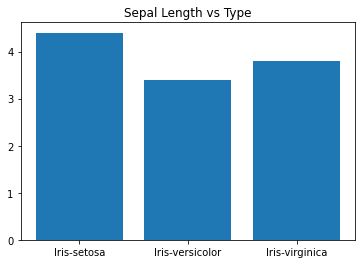

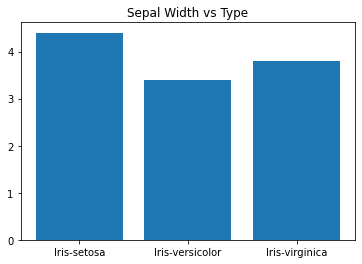

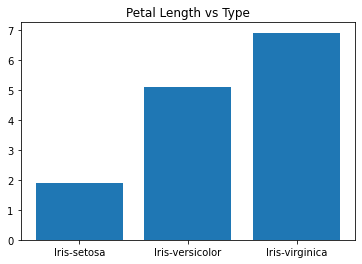

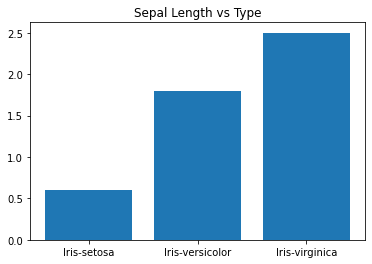

In [13]:
plt.bar(df['type'],df['sepal-width']) #Sepal Length vs Type
plt.title("Sepal Length vs Type")
plt.show()
plt.bar(df['type'],df['sepal-width']) #Sepal Width vs Type
plt.title("Sepal Width vs Type")
plt.show()
plt.bar(df['type'],df['petal-length']) #Petal Length vs Type
plt.title("Petal Length vs Type")
plt.show()
plt.bar(df['type'],df['petal-width']) #Petal Width vs Type
plt.title("Sepal Length vs Type")
plt.show()

#### Pair Plot for the data

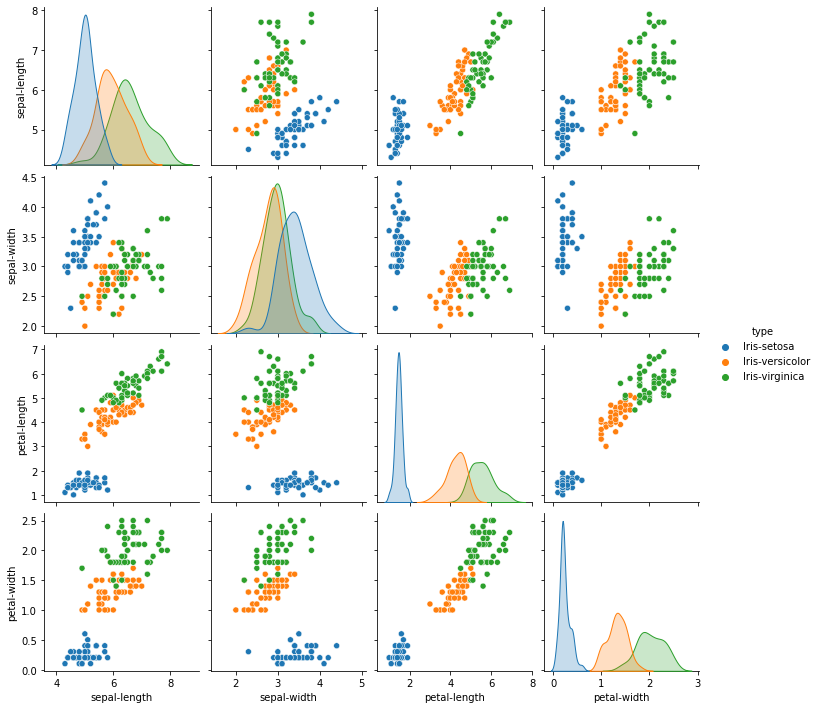

In [14]:
sns.pairplot(df, hue =  'type')
plt.show()

#### Correlation for the dataset

In [15]:
df1 = df.drop('type', axis = 1)
corr_df = df1.corr()

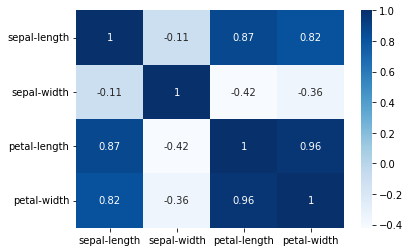

In [16]:
sns.heatmap(corr_df, annot = True, cmap = 'Blues')
plt.show()

### Data Preparation

In [17]:
from sklearn import preprocessing


In [18]:
X = df.iloc[:, 0:4]
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
Y = df['type'].to_frame()
Y

,type
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Normalization of Data

In [20]:
std = preprocessing.StandardScaler()
X = std.fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

### Splitting dataset into Train and Test sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size = 0.3, random_state = 1)
print("x_train :" + str(x_train.shape))
print("x_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

x_train :(105, 4)
x_test :(45, 4)
y_train :(105, 1)
y_test :(45, 1)


### Model Creation

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Finding best K value for the model

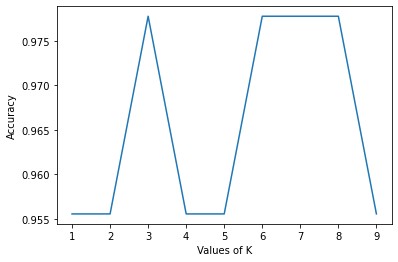

From above line plot, the model giving maximum accuracy for the K = 3


In [24]:
best_k = 0
best_acc = 0.0
acc_arr = np.zeros((9,))

for k in range(1,10):
    # model creation and prediction on X2
    knn_temp = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y2_result = knn_temp.predict(x_test)
    
    # calculating accuracy of model
    acc_score = accuracy_score(y_test, y2_result)
    acc_arr[k-1] = acc_score
    
    if acc_score > best_acc:
        best_k = k
        knn = knn_temp
        best_acc = acc_score
        
plt.plot(range(1,10),acc_arr)
plt.xlabel("Values of K")
plt.ylabel("Accuracy")
plt.show()

print("From above line plot, the model giving maximum accuracy for the K =",best_k)

We get the value <b>K = 3</b> for most accuracy.

### Prediction using Classification Model

In [25]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train, y_train)
y_pred =  knn.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### Evaluation of the created Model

In [26]:
acc =  accuracy_score(y_pred, y_test)
print("Accuracy of the created KNN model is " + str(acc*100) +"%")

Accuracy of the created KNN model is 97.77777777777777%


In [27]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [28]:
lst = df['type'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,18,0
Iris-virginica,0,1,12


The accuracy of the KNN model is <b>97.7%</b>.

###  CONCLUSION :

 <ul> 
    <li>  <b>KNN</b>  algorithm is able to predict the values quite accurately.
    <li> The accuracy of the <b>KNN</b> algorithm is <b>97.7%</b>.
    </ul> <br>
